# Bagging and Pasting with Decision Tree, KNN with Hyperparameter tuning
Breast Cancer Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

In [25]:
dir(dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [26]:
feature_names = dataset.feature_names
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [27]:
X_df = pd.DataFrame(X, columns = feature_names)

In [28]:
X_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [30]:
X_df.shape

(569, 30)

# KNN with Bagging classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
k_range=range(1,26)
score = []
for k in k_range:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state=4)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score.append(metrics.accuracy_score(y_test,y_pred))
#thelist prints all the value of accuracy for each K
  
print(dict(zip(k_range,score)))

{1: 0.9035087719298246, 2: 0.8728070175438597, 3: 0.9166666666666666, 4: 0.9035087719298246, 5: 0.9078947368421053, 6: 0.9122807017543859, 7: 0.9166666666666666, 8: 0.9166666666666666, 9: 0.9166666666666666, 10: 0.9122807017543859, 11: 0.9122807017543859, 12: 0.9078947368421053, 13: 0.9122807017543859, 14: 0.9078947368421053, 15: 0.9122807017543859, 16: 0.9078947368421053, 17: 0.9078947368421053, 18: 0.8991228070175439, 19: 0.8991228070175439, 20: 0.9035087719298246, 21: 0.8947368421052632, 22: 0.8947368421052632, 23: 0.8947368421052632, 24: 0.8947368421052632, 25: 0.8947368421052632}


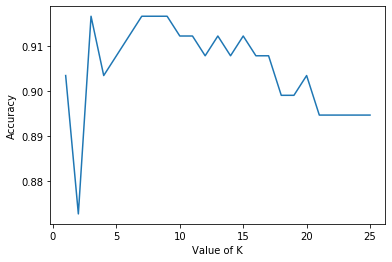

In [36]:
import matplotlib.pyplot as plt
plt.plot(k_range,score)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.show()

In [37]:
knn_best = KNeighborsClassifier(n_neighbors=8)

conclude that the value of K at 3,7,8,9 is the best. we will go for 9 to avoid overfitting

In [38]:
bag_knn = BaggingClassifier(knn_best,
                            n_estimators=50, max_samples=0.5,
                            bootstrap=True, random_state=4,oob_score=True,verbose = 3)

In [39]:
bag_knn.fit(X_train, y_train)
bag_knn.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Building estimator 1 of 50 for this parallel run (total 50)...
Building estimator 2 of 50 for this parallel run (total 50)...
Building estimator 3 of 50 for this parallel run (total 50)...
Building estimator 4 of 50 for this parallel run (total 50)...
Building estimator 5 of 50 for this parallel run (total 50)...
Building estimator 6 of 50 for this parallel run (total 50)...
Building estimator 7 of 50 for this parallel run (total 50)...
Building estimator 8 of 50 for this parallel run (total 50)...
Building estimator 9 of 50 for this parallel run (total 50)...
Building estimator 10 of 50 for this parallel run (total 50)...
Building estimator 11 of 50 for this parallel run (total 50)...
Building estimator 12 of 50 for this parallel run (total 50)...
Building estimator 13 of 50 for this parallel run (total 50)...
Building estimator 14 of 50 for this parallel run (total 50)...
Building estimator 15 of 50 for this parallel run (total 50)...
Building estimator 16 of 50 for this parallel run

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


0.9078947368421053

In [40]:
bag_knn.oob_score_

0.9413489736070382

In [43]:
from sklearn.model_selection import train_test_split,GridSearchCV

# Decision Tree with Bagging classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
    'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
    'splitter' : ['best', 'random']
    
}
grid_param

{'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 32),
 'min_samples_leaf': array([0.1, 0.2, 0.3, 0.4, 0.5]),
 'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'splitter': ['best', 'random']}

In [44]:
grid_search = GridSearchCV(estimator=dtc,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1,verbose = 3)

In [45]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 6000 candidates, totalling 30000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 6672 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 11280 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 16912 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 23568 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 30000 out of 30000 | elapsed:   35.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [46]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 0.1, 'min_samples_split': 0.30000000000000004, 'splitter': 'random'}


In [47]:
dtc_best = DecisionTreeClassifier(criterion = 'entropy', max_depth =18, min_samples_leaf= 0.1, min_samples_split= 0.30000000000000004, splitter ='random')

In [50]:
bag_dtc = BaggingClassifier(dtc_best,
                            n_estimators=50, max_samples=0.5,
                            bootstrap=True, random_state=4,oob_score=True,verbose = 3)

In [51]:
bag_dtc.fit(X_train, y_train)
bag_dtc.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Building estimator 1 of 50 for this parallel run (total 50)...
Building estimator 2 of 50 for this parallel run (total 50)...
Building estimator 3 of 50 for this parallel run (total 50)...
Building estimator 4 of 50 for this parallel run (total 50)...
Building estimator 5 of 50 for this parallel run (total 50)...
Building estimator 6 of 50 for this parallel run (total 50)...
Building estimator 7 of 50 for this parallel run (total 50)...
Building estimator 8 of 50 for this parallel run (total 50)...
Building estimator 9 of 50 for this parallel run (total 50)...
Building estimator 10 of 50 for this parallel run (total 50)...
Building estimator 11 of 50 for this parallel run (total 50)...
Building estimator 12 of 50 for this parallel run (total 50)...
Building estimator 13 of 50 for this parallel run (total 50)...
Building estimator 14 of 50 for this parallel run (total 50)...
Building estimator 15 of 50 for this parallel run (total 50)...
Building estimator 16 of 50 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0.9166666666666666

In [52]:
bag_dtc.oob_score_

0.9442815249266863

Conclude from bagging classifier that botgh KNN and Decision Tree with hyper parameter tuning performs very well

# Pasting - Boostrap = False - meaning no replacement and the scores are highly correlated
Out of bag estimation only available if bootstrap=True

In [54]:
pasting_knn = BaggingClassifier(knn_best,
                            n_estimators=50, max_samples=0.5,
                            bootstrap=False, random_state=4,verbose = 3)
pasting_knn.fit(X_train, y_train)
pasting_knn.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 50 for this parallel run (total 50)...
Building estimator 2 of 50 for this parallel run (total 50)...
Building estimator 3 of 50 for this parallel run (total 50)...
Building estimator 4 of 50 for this parallel run (total 50)...
Building estimator 5 of 50 for this parallel run (total 50)...
Building estimator 6 of 50 for this parallel run (total 50)...
Building estimator 7 of 50 for this parallel run (total 50)...
Building estimator 8 of 50 for this parallel run (total 50)...
Building estimator 9 of 50 for this parallel run (total 50)...
Building estimator 10 of 50 for this parallel run (total 50)...
Building estimator 11 of 50 for this parallel run (total 50)...
Building estimator 12 of 50 for this parallel run (total 50)...
Building estimator 13 of 50 for this parallel run (total 50)...
Building estimator 14 of 50 for this parallel run (total 50)...
Building estimator 15 of 50 for this parallel run (total 50)...
Building estimator 16 of 50 for this parallel run

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


0.9122807017543859

In [55]:
pasting_dtc = BaggingClassifier(dtc_best,
                            n_estimators=50, max_samples=0.5,
                            bootstrap=False, random_state=4,verbose = 3)
pasting_dtc.fit(X_train, y_train)
pasting_dtc.score(X_test, y_test)

Building estimator 1 of 50 for this parallel run (total 50)...
Building estimator 2 of 50 for this parallel run (total 50)...
Building estimator 3 of 50 for this parallel run (total 50)...
Building estimator 4 of 50 for this parallel run (total 50)...
Building estimator 5 of 50 for this parallel run (total 50)...
Building estimator 6 of 50 for this parallel run (total 50)...
Building estimator 7 of 50 for this parallel run (total 50)...
Building estimator 8 of 50 for this parallel run (total 50)...
Building estimator 9 of 50 for this parallel run (total 50)...
Building estimator 10 of 50 for this parallel run (total 50)...
Building estimator 11 of 50 for this parallel run (total 50)...
Building estimator 12 of 50 for this parallel run (total 50)...
Building estimator 13 of 50 for this parallel run (total 50)...
Building estimator 14 of 50 for this parallel run (total 50)...
Building estimator 15 of 50 for this parallel run (total 50)...
Building estimator 16 of 50 for this parallel run

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0.9254385964912281

# Random Forest - special case of Bagging with randomly selected features as well
winequality dataset

In [56]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [57]:
data = pd.read_csv("winequality_red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [61]:
X = data.drop(columns = 'quality')
y = data['quality']

In [62]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 4)

In [65]:
rand_clf = RandomForestClassifier(random_state=4)

In [66]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [67]:
rand_clf.feature_importances_

array([0.07443077, 0.10825212, 0.07192554, 0.06979039, 0.07918744,
       0.0683394 , 0.10047233, 0.08963041, 0.07815551, 0.10954752,
       0.15026857])

In [70]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
    'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
    'max_features' : ['auto','log2']
}
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 12000 candidates, totalling 60000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [71]:
grid_search.best_params_

{'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 90}

In [72]:
rand_clf_best = RandomForestClassifier(max_depth = 3,
min_samples_leaf = 0.1,
min_samples_split= 0.1,
n_estimators = 90, random_state=4)
rand_clf_best.fit(x_train,y_train)
rand_clf.score(x_test,y_test)

0.68125

In [73]:
import pickle

with open('finalized_model_Random_Forest.pickle', 'wb') as f:
    pickle.dump(rand_clf_best,f)